<a href="https://colab.research.google.com/github/kyjness/personal/blob/main/Backpack_Prediction_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#탐색적 데이터 분석

In [ ]:
import pandas as pd
import warnings

# 경고 메시지 숨기기
warnings.filterwarnings("ignore")

#데이터로드
raw_df = pd.read_csv('/content/drive/MyDrive/competition/Backpack Prediction Challenge/train.csv')
test = pd.read_csv('/content/drive/MyDrive/competition/Backpack Prediction Challenge/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/competition/Backpack Prediction Challenge/sample_submission.csv')
raw_df.head(10)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
5,5,Nike,Canvas,Medium,10.0,No,Yes,NaN,Black,7.241812,20.01553
6,6,Nike,NaN,Large,3.0,No,No,Backpack,Green,6.828123,84.80500
7,7,Puma,Canvas,Small,1.0,Yes,Yes,Backpack,Blue,21.488864,27.15815
8,8,Under Armour,Polyester,Medium,8.0,Yes,No,Tote,Gray,10.207780,25.98652
9,9,Under Armour,Nylon,Medium,2.0,Yes,Yes,Messenger,Pink,15.895100,38.48741


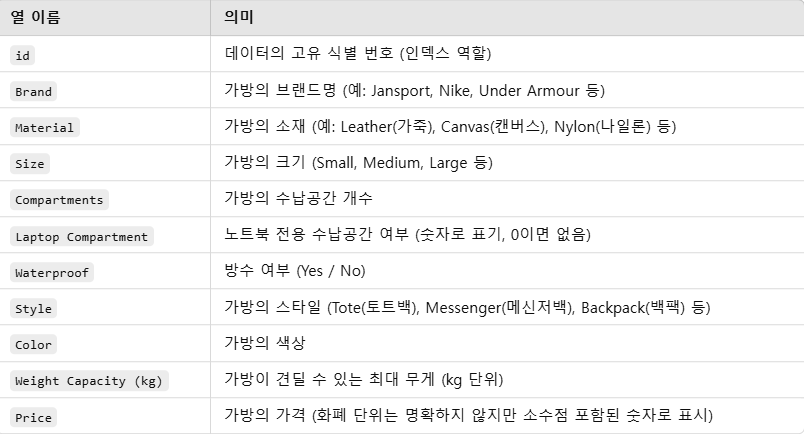

In [ ]:
raw_df.shape,test.shape

((300000, 11), (200000, 10))

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [ ]:
raw_df.describe()

,id,Compartments,Weight Capacity (kg),Price
count,300000.000000,300000.000000,299862.000000,300000.000000
mean,149999.500000,5.443590,18.029994,81.411107
std,86602.684716,2.890766,6.966914,39.039340
min,0.000000,1.000000,5.000000,15.000000
25%,74999.750000,3.000000,12.097867,47.384620
50%,149999.500000,5.000000,18.068614,80.956120
75%,224999.250000,8.000000,24.002375,115.018160
max,299999.000000,10.000000,30.000000,150.000000


In [ ]:
raw_df.isnull().sum().sort_values(ascending=False)

,0
Color,9950
Brand,9705
Material,8347
Style,7970
Laptop Compartment,7444
Waterproof,7050
Size,6595
Weight Capacity (kg),138
id,0
Compartments,0


In [ ]:
df = raw_df.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)
df.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


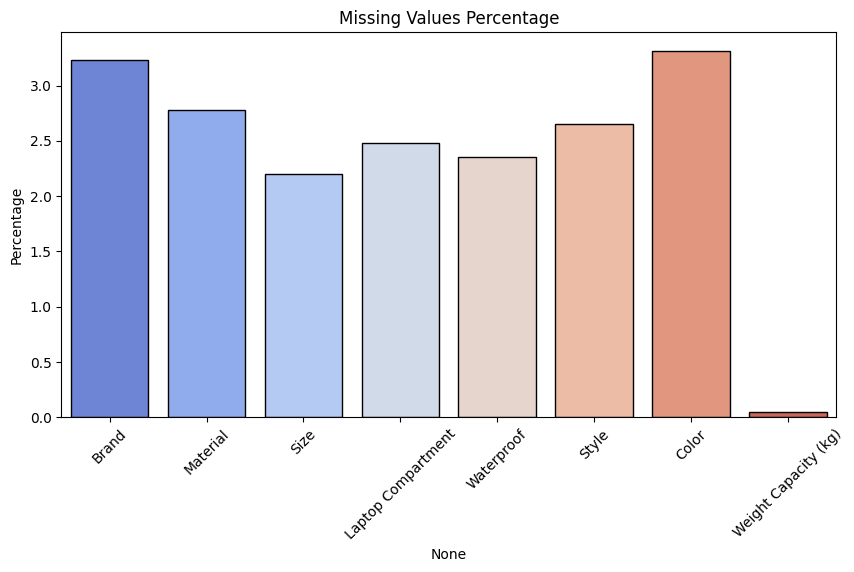

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 결측치 비율 확인
missing_values = df.isnull().mean() * 100
if missing_values.sum() > 0:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=missing_values[missing_values > 0].index, y=missing_values[missing_values > 0], palette="coolwarm", edgecolor='k', hue=None)
    plt.title("Missing Values Percentage")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
from sys import is_finalizing

def resumetable(df):
  print(f'데이터셋 형상: {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns = {'index':'피처'})
  summary['결측값 개수'] = df.isnull().sum().values
  summary['결측값 비율(%)'] = df.isnull().sum().values/df.shape[0]*100
  summary['고유값 개수'] = df.nunique().values
  summary['데이터 종류']= None
  for col in df.columns:
    if df[col].nunique() == 2:
      summary.loc[summary['피처'] == col, '데이터 종류'] = '이진형'
    elif df[col].dtype == 'object':
      summary.loc[summary['피처'] == col, '데이터 종류'] = '범주형'
    else:
      summary.loc[summary['피처'] == col, '데이터 종류'] = '연속형'
  return summary

resumetable(df)

데이터셋 형상: (300000, 10)


,피처,데이터 타입,결측값 개수,결측값 비율(%),고유값 개수,데이터 종류
0,Brand,object,9705,3.235000,5,범주형
1,Material,object,8347,2.782333,4,범주형
2,Size,object,6595,2.198333,3,범주형
3,Compartments,float64,0,0.000000,10,연속형
4,Laptop Compartment,object,7444,2.481333,2,이진형
5,Waterproof,object,7050,2.350000,2,이진형
6,Style,object,7970,2.656667,3,범주형
7,Color,object,9950,3.316667,6,범주형
8,Weight Capacity (kg),float64,138,0.046000,181596,연속형
9,Price,float64,0,0.000000,48212,연속형


In [ ]:
df.groupby('Brand')['Price'].agg(Price_mean =('mean'))

,Price_mean
Brand,
Adidas,80.631060
Jansport,81.791276
Nike,81.319209
Puma,81.448607
Under Armour,81.976311


In [ ]:
df.groupby('Material')['Price'].agg(Price_mean =('mean'))

,Price_mean
Material,
Canvas,82.106511
Leather,80.437883
Nylon,81.024760
Polyester,82.033315


,Price
count,300000.000000
mean,81.411107
std,39.039340
min,15.000000
25%,47.384620
50%,80.956120
75%,115.018160
max,150.000000


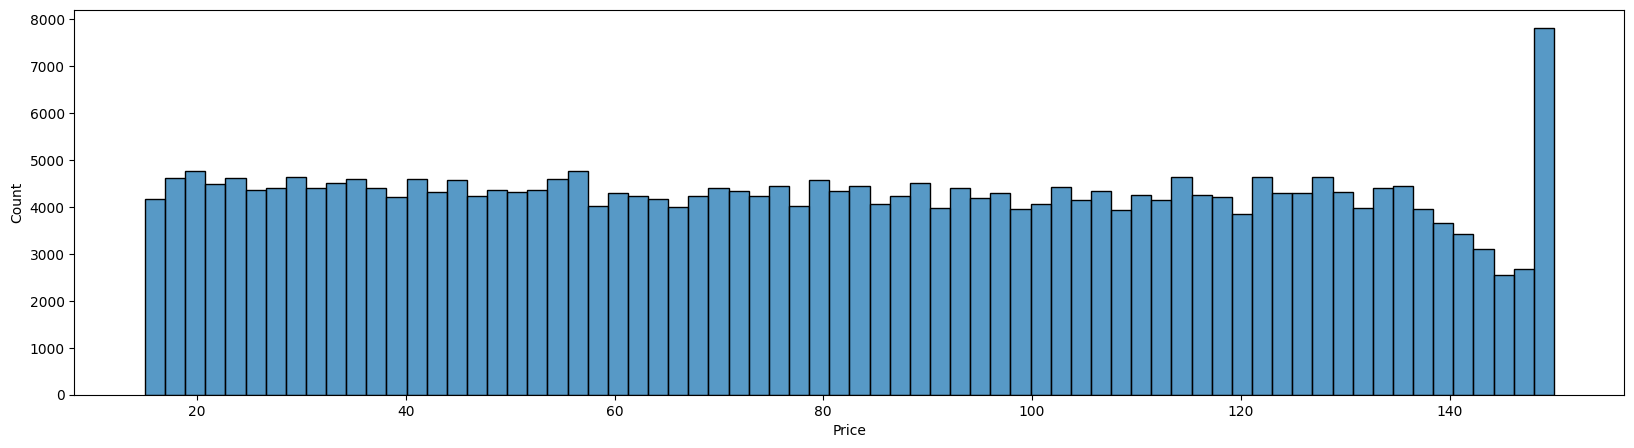

In [ ]:
#'Price'컬럼 시각화

import matplotlib.pyplot as plt
import seaborn as sns

display(pd.DataFrame(df['Price'].describe()))
plt.figure(figsize=(20,5))
sns.histplot(df['Price'], bins=70)
plt.show()

In [ ]:
#중복행 확인
duplicated_rows = df.duplicated()
sum(duplicated_rows)

0

In [ ]:
#범주형
categorical_columns = df.select_dtypes(include=['object']).columns
test_categorical_columns = test.select_dtypes(include=['object']).columns

#연속형
numerical_columns = df.select_dtypes(include=['float64']).columns
test_numerical_columns = test.select_dtypes(include=['float64']).columns

#범주형인 경우 최빈값으로 채우기(mode()) - 최빈값이 여러 개인 경우 첫번째로 채우기
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])
test[test_categorical_columns] = test[test_categorical_columns].fillna(test[test_categorical_columns].mode().iloc[0])

#연속형 변수의 경우 - median으로 채움
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())
test[test_numerical_columns] = test[test_numerical_columns].fillna(test[test_numerical_columns].median())

In [ ]:
resumetable(df)

데이터셋 형상: (300000, 10)


,피처,데이터 타입,결측값 개수,결측값 비율(%),고유값 개수,데이터 종류
0,Brand,object,0,0.0,5,범주형
1,Material,object,0,0.0,4,범주형
2,Size,object,0,0.0,3,범주형
3,Compartments,float64,0,0.0,10,연속형
4,Laptop Compartment,object,0,0.0,2,이진형
5,Waterproof,object,0,0.0,2,이진형
6,Style,object,0,0.0,3,범주형
7,Color,object,0,0.0,6,범주형
8,Weight Capacity (kg),float64,0,0.0,181596,연속형
9,Price,float64,0,0.0,48212,연속형


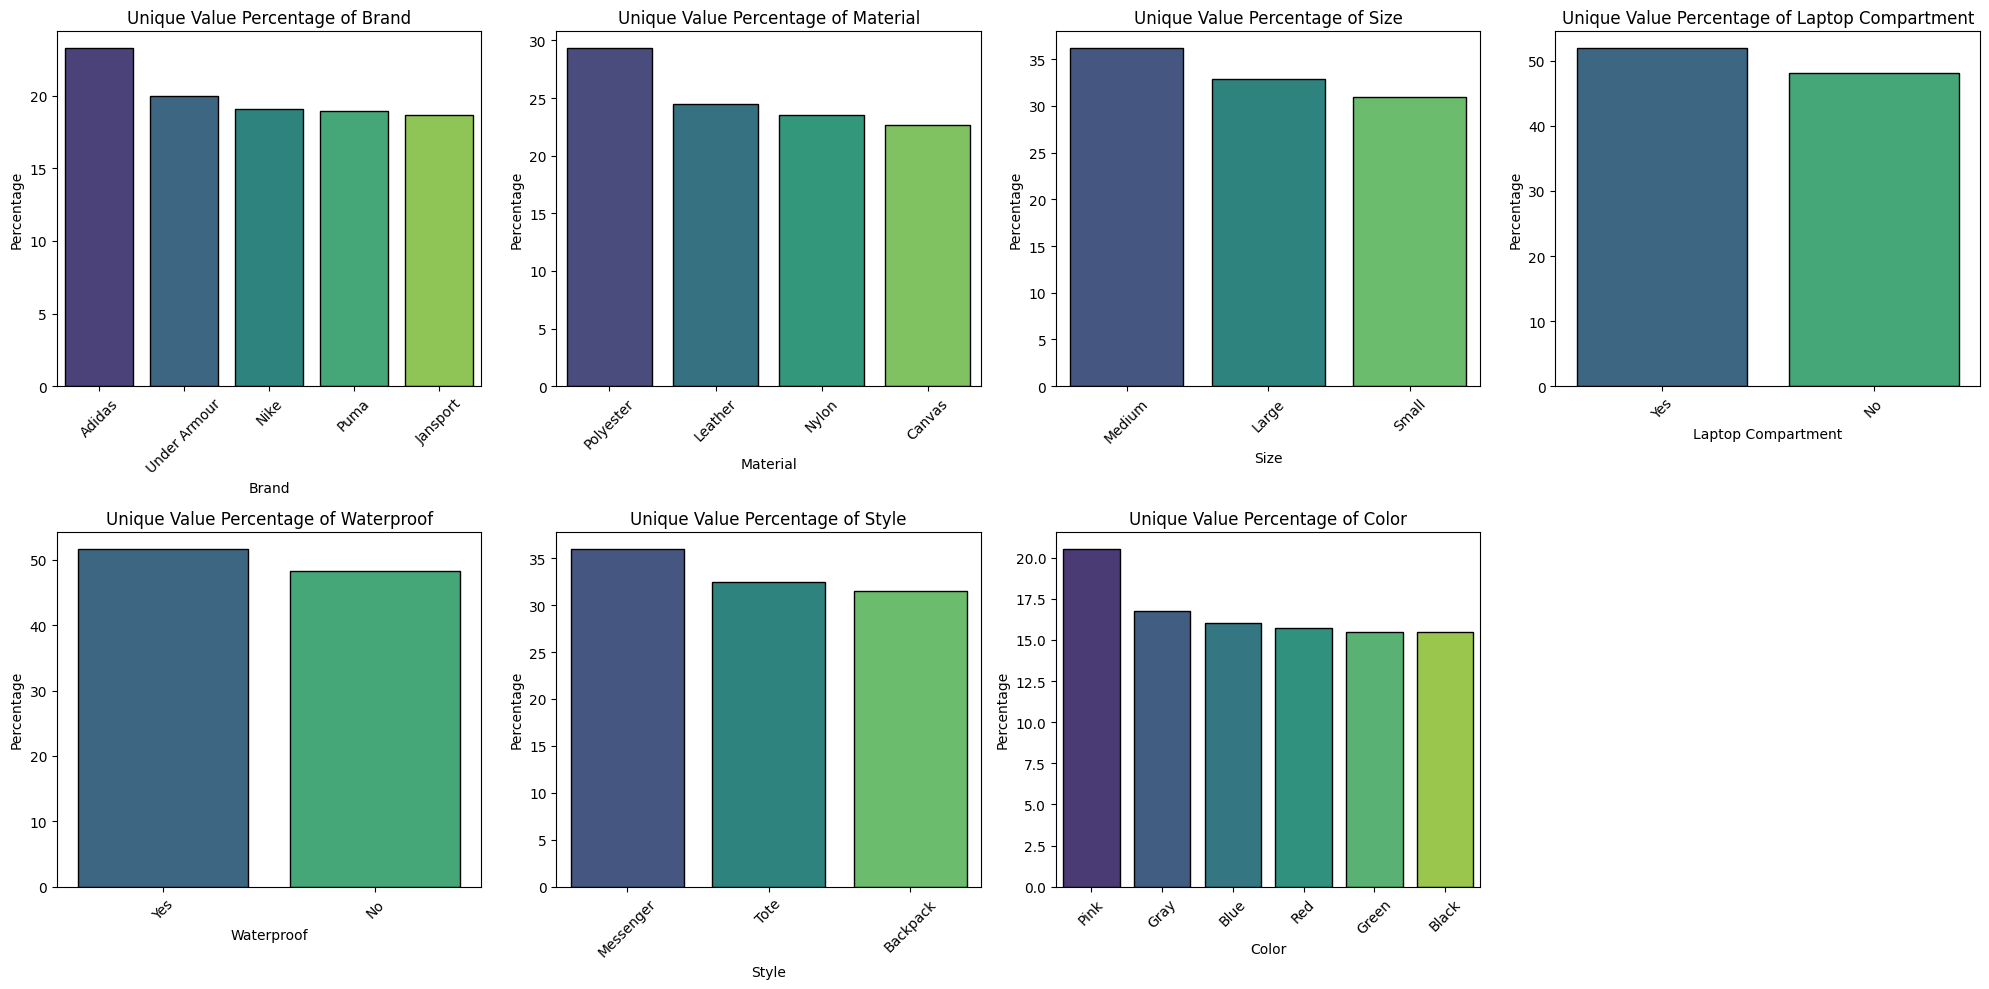

In [ ]:
#범주형 컬럼 고유값 비율 시각화
categorical_columns = df.select_dtypes(include=['object']).columns
num_plots = min(len(categorical_columns), 7)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_columns[:num_plots]):
    sns.barplot(x=df[col].value_counts(normalize=True).index,
                y=df[col].value_counts(normalize=True) * 100,
                ax=axes[i], palette="viridis", edgecolor='k')
    axes[i].set_title(f'Unique Value Percentage of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Percentage')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

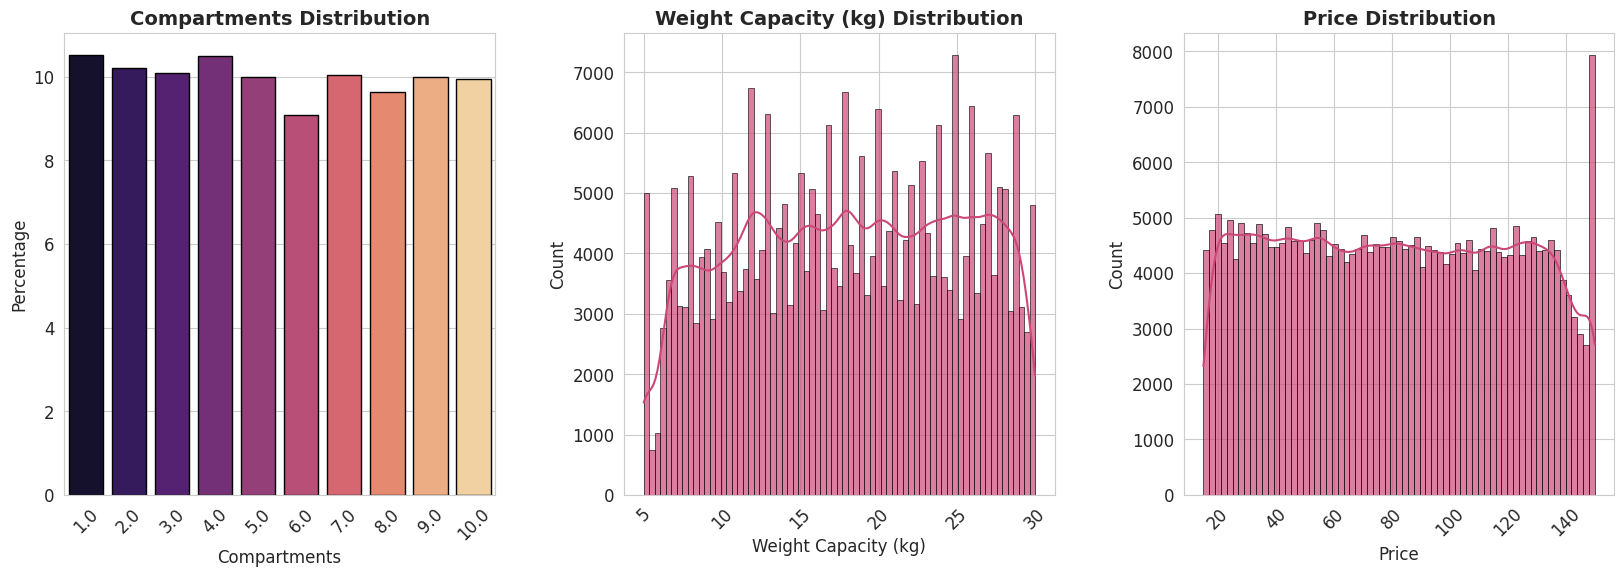

In [ ]:
#연속형 컬럼 고유값 비율 시각화
# 스타일 설정
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# 연속형 컬럼 선택
numerical_columns = df.select_dtypes(include=['float64']).columns

# 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 시각화
for i, col in enumerate(numerical_columns[:3]):  # 최대 3개까지만 출력
    ax = axes[i]
    if df[col].nunique() > 10:  # 히스토그램
        sns.histplot(df[col], ax=ax, kde=True, color=plt.cm.get_cmap('plasma')(0.5), edgecolor='black', alpha=0.7)
    else:  # 바 차트
        value_counts = df[col].value_counts(normalize=True)
        sns.barplot(x=value_counts.index, y=value_counts.values * 100, ax=ax,
                    palette='magma', edgecolor='black')
        ax.set_ylabel('Percentage')

    ax.set_title(f'{col} Distribution', fontsize=14, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)

plt.subplots_adjust(wspace=0.3)  # 그래프 간격 조정
plt.show()

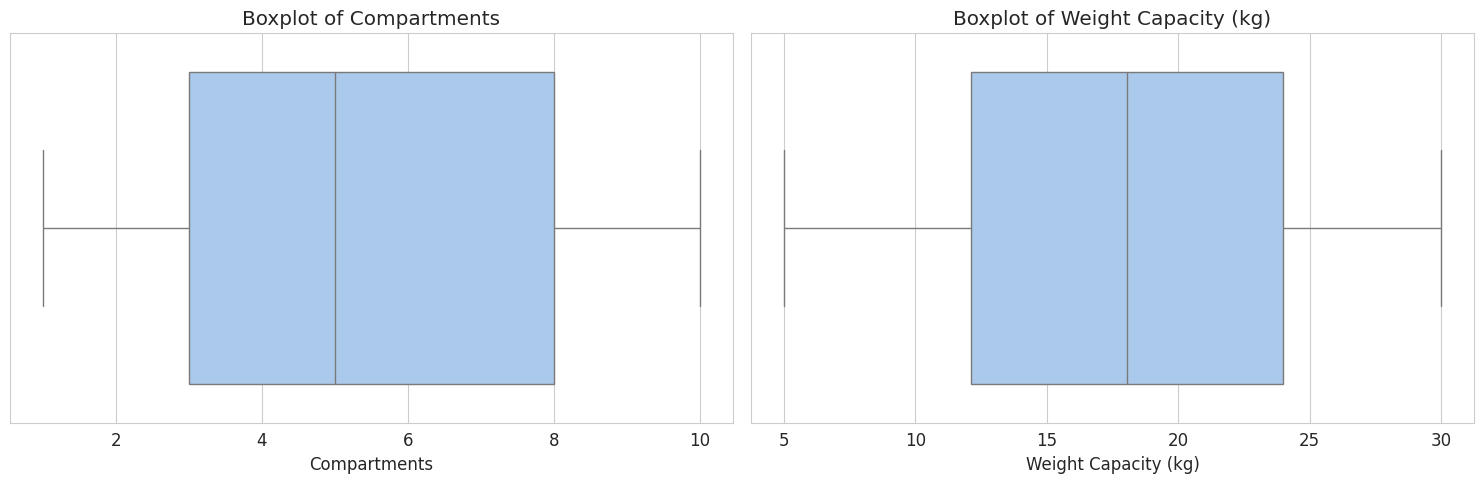

In [ ]:
# 연속형 컬럼 이상값 시각화 (타겟 변수 제외)
numeric_columns = df.select_dtypes(include=['float64']).columns.drop('Price')
fig, axes = plt.subplots(1, 2, figsize=(15, 5 * (len(numeric_columns) // 2 + len(numeric_columns) % 2)))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], palette="pastel", ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
# 이상값 탐색 및 출력 (IQR 방식 적용, 타겟 변수 제외)
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}, Lower Bound={lower_bound:.2f}, Upper Bound={upper_bound:.2f}, 이상값 개수: {outliers.shape[0]}")

Compartments: Q1=3.00, Q3=8.00, IQR=5.00, Lower Bound=-4.50, Upper Bound=15.50, 이상값 개수: 0
Weight Capacity (kg): Q1=12.10, Q3=24.00, IQR=11.90, Lower Bound=-5.75, Upper Bound=41.85, 이상값 개수: 0


테스트 데이터

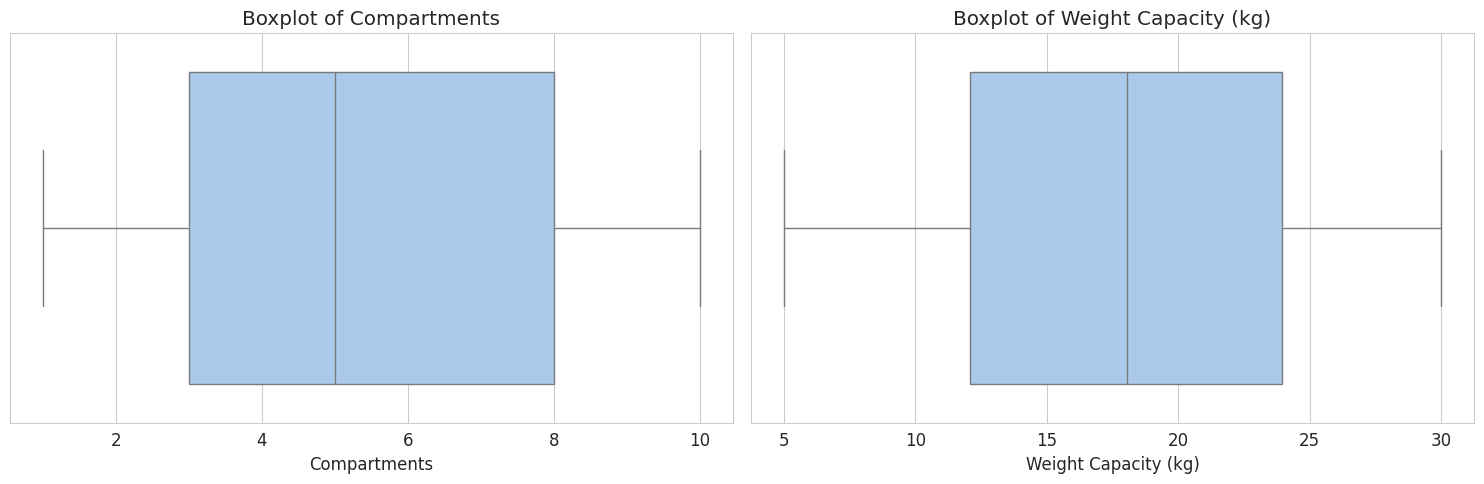

Compartments: Q1=3.00, Q3=8.00, IQR=5.00, Lower Bound=-4.50, Upper Bound=15.50, 이상값 개수: 0
Weight Capacity (kg): Q1=12.10, Q3=24.00, IQR=11.90, Lower Bound=-5.75, Upper Bound=41.85, 이상값 개수: 0


In [ ]:
# 이상값 시각화 (2열로 구성, 타겟 변수 제외)
numeric_columns = test.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5 * (len(numeric_columns) // 2 + len(numeric_columns) % 2)))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=test[col], palette="pastel", ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 이상값 탐색 및 출력 (IQR 방식 적용, 타겟 변수 제외)
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}, Lower Bound={lower_bound:.2f}, Upper Bound={upper_bound:.2f}, 이상값 개수: {outliers.shape[0]}")

#Baseline

In [ ]:
df1 = df.copy()
test1 = test.copy()

피처엔지니어링

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 범주형 데이터 변환
# 순서형 변수 (Size) 처리 - 작은 값부터 순위 부여
df1["Size"] = df1["Size"].map({"Small": 1, "Medium": 2, "Large": 3})
test1["Size"] = test1["Size"].map({"Small": 1, "Medium": 2, "Large": 3})

# 이진형 변수 (Waterproof) 처리
df1['Laptop Compartment'] = df1['Laptop Compartment'].map({'No': 0, 'Yes': 1})
test1['Laptop Compartment'] = test1['Laptop Compartment'].map({'No': 0, 'Yes': 1})
df1["Waterproof"] = df1["Waterproof"].map({"No": 0, "Yes": 1})
test1["Waterproof"] = test1["Waterproof"].map({"No": 0, "Yes": 1})

# 명목형 변수 (Brand, Material, Color) 원핫 인코딩
ohe_cols = ["Brand", "Material", "Color","Style"]
df1 = pd.get_dummies(df1, columns=ohe_cols, drop_first=True)
test1 = pd.get_dummies(test1, columns=ohe_cols, drop_first=True)

df1

,Size,Compartments,Laptop Compartment,Waterproof,Weight Capacity (kg),Price,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Leather,Material_Nylon,Material_Polyester,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red,Style_Messenger,Style_Tote
0,2,7.0,1,0,11.611723,112.15875,True,False,False,False,True,False,False,False,False,False,False,False,False,True
1,1,10.0,1,1,27.078537,68.88056,True,False,False,False,False,False,False,False,False,True,False,False,True,False
2,1,2.0,1,0,16.643760,39.17320,False,False,False,True,True,False,False,False,False,False,False,True,True,False
3,1,8.0,1,0,12.937220,80.60793,False,True,False,False,False,True,False,False,False,True,False,False,True,False
4,2,1.0,1,1,17.749338,86.02312,False,False,False,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1,9.0,0,0,12.730812,129.99749,False,False,False,False,True,False,False,True,False,False,False,False,False,True
299996,3,6.0,0,1,26.633182,19.85819,True,False,False,False,True,False,False,True,False,False,False,False,False,True
299997,3,9.0,1,1,11.898250,111.41364,False,False,True,False,False,False,False,False,False,False,True,False,False,False
299998,1,1.0,0,1,6.175738,115.89080,False,False,False,False,False,True,False,False,False,False,True,False,False,True


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Size                  300000 non-null  int64  
 1   Compartments          300000 non-null  float64
 2   Laptop Compartment    300000 non-null  int64  
 3   Waterproof            300000 non-null  int64  
 4   Weight Capacity (kg)  300000 non-null  float64
 5   Price                 300000 non-null  float64
 6   Brand_Jansport        300000 non-null  bool   
 7   Brand_Nike            300000 non-null  bool   
 8   Brand_Puma            300000 non-null  bool   
 9   Brand_Under Armour    300000 non-null  bool   
 10  Material_Leather      300000 non-null  bool   
 11  Material_Nylon        300000 non-null  bool   
 12  Material_Polyester    300000 non-null  bool   
 13  Color_Blue            300000 non-null  bool   
 14  Color_Gray            300000 non-null  bool   
 15  

하이퍼파라미터 튜닝

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.1 MB/s eta 0:00:00


In [ ]:
import optuna
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 훈련/테스트 데이터 분할
X = df1.drop(columns=['Price'])
y = df1['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost 하이퍼파라미터 튜닝 함수
def objective_catboost(trial):
    param = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),  # log scale 사용
        "depth": trial.suggest_int("depth", 3, 6),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 10.0, log=True),
        "loss_function": "RMSE",
        "random_seed": 42,
        "verbose": 0  # 로그 출력 최소화
    }

    # 모델 학습 및 교차 검증 (5-Fold CV 사용)
    model = CatBoostRegressor(**param)
    score = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)

    return np.mean(score)  # 평균 MSE 반환 (Optuna는 `minimize` 방향이므로 음수 MSE 사용)


catboost = optuna.create_study(direction="maximize")  # 음수 MSE 최대화 = RMSE 최소화
catboost.optimize(objective_catboost, n_trials=10)  # 시도 횟수 조정 가능
print("CatBoost Best params:", catboost.best_params)

[I 2025-02-24 00:50:30,955] A new study created in memory with name: no-name-73ebc6ac-e57e-4e16-b054-5d019cec62dc
[I 2025-02-24 00:51:49,592] Trial 0 finished with value: -1521.980040944284 and parameters: {'learning_rate': 0.0231957158826743, 'depth': 3, 'l2_leaf_reg': 6.955751353844708}. Best is trial 0 with value: -1521.980040944284.
[I 2025-02-24 00:53:04,766] Trial 1 finished with value: -1522.254797470392 and parameters: {'learning_rate': 0.007221764974603669, 'depth': 5, 'l2_leaf_reg': 3.456570300846598}. Best is trial 0 with value: -1521.980040944284.
[I 2025-02-24 00:54:29,091] Trial 2 finished with value: -1524.2375169889376 and parameters: {'learning_rate': 0.031894841136888286, 'depth': 6, 'l2_leaf_reg': 6.393266329964904}. Best is trial 0 with value: -1521.980040944284.
[I 2025-02-24 00:55:53,053] Trial 3 finished with value: -1522.3750984443998 and parameters: {'learning_rate': 0.00557292694975376, 'depth': 6, 'l2_leaf_reg': 0.05742731567479002}. Best is trial 0 with valu

CatBoost Best params: {'learning_rate': 0.0231957158826743, 'depth': 3, 'l2_leaf_reg': 6.955751353844708}


In [ ]:
import optuna
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 훈련/테스트 데이터 분할
X = df1.drop(columns=['Price'])
y = df1['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective_lightgbm(trial):
    param = {
        "n_estimators": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "min_child_samples": trial.suggest_int("min_child_samples", 1, 100),
        "random_seed": 42,
    }
    # 모델 학습 및 교차 검증 (5-Fold CV 사용)
    model = LGBMRegressor(**param)
    score = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)

    return np.mean(score)

def objective_xgboost(trial):
    param = {
        "n_estimators":1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "random_seed": 42,
    }
    # 모델 학습 및 교차 검증 (5-Fold CV 사용)
    model = XGBRegressor(**param)
    score = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)

    return np.mean(score)

# LightGBM
lightgbm = optuna.create_study(direction="minimize")
lightgbm.optimize(objective_lightgbm, n_trials=10) # n_trials 조정
print("LightGBM Best params:", lightgbm.best_params)

# XGBoost
xgboost = optuna.create_study(direction="minimize")
xgboost.optimize(objective_xgboost, n_trials=10) # n_trials 조정
print("XGBoost Best params:", xgboost.best_params)

[I 2025-02-23 23:38:33,703] A new study created in memory with name: no-name-078a9fe6-8c3c-4980-893e-152db5a69af3
[I 2025-02-23 23:40:02,895] Trial 0 finished with value: -1532.8401834108302 and parameters: {'learning_rate': 0.034939778480161325, 'max_depth': 6, 'num_leaves': 175, 'min_child_samples': 90}. Best is trial 0 with value: -1532.8401834108302.
[I 2025-02-23 23:40:38,550] Trial 1 finished with value: -1522.6241042007048 and parameters: {'learning_rate': 0.0012931805416786012, 'max_depth': 3, 'num_leaves': 208, 'min_child_samples': 23}. Best is trial 0 with value: -1532.8401834108302.
[I 2025-02-23 23:41:25,078] Trial 2 finished with value: -1522.9921990727642 and parameters: {'learning_rate': 0.01523098971255185, 'max_depth': 4, 'num_leaves': 90, 'min_child_samples': 31}. Best is trial 0 with value: -1532.8401834108302.
[I 2025-02-23 23:42:49,210] Trial 3 finished with value: -1534.9170127125026 and parameters: {'learning_rate': 0.02035088076723326, 'max_depth': 8, 'num_leave

LightGBM Best params: {'learning_rate': 0.03149881831706555, 'max_depth': 7, 'num_leaves': 99, 'min_child_samples': 36}


[I 2025-02-23 23:51:27,338] Trial 0 finished with value: -1540.592273343883 and parameters: {'learning_rate': 0.017225844590857565, 'max_depth': 8, 'subsample': 0.511906236865195, 'colsample_bytree': 0.8713594867617187, 'min_child_weight': 6}. Best is trial 0 with value: -1540.592273343883.
[I 2025-02-23 23:52:35,752] Trial 1 finished with value: -1522.5969409572826 and parameters: {'learning_rate': 0.0013190618112609766, 'max_depth': 7, 'subsample': 0.7006329094444734, 'colsample_bytree': 0.5475503332618832, 'min_child_weight': 4}. Best is trial 0 with value: -1540.592273343883.
[I 2025-02-23 23:53:30,480] Trial 2 finished with value: -1530.5977679647058 and parameters: {'learning_rate': 0.024204276393387687, 'max_depth': 6, 'subsample': 0.7944325089481687, 'colsample_bytree': 0.9224644222393901, 'min_child_weight': 2}. Best is trial 0 with value: -1540.592273343883.
[I 2025-02-23 23:54:23,022] Trial 3 finished with value: -1545.47046465568 and parameters: {'learning_rate': 0.05948055

XGBoost Best params: {'learning_rate': 0.07979799630721822, 'max_depth': 8, 'subsample': 0.8687696721784752, 'colsample_bytree': 0.6305263431253195, 'min_child_weight': 10}


##Catboost

In [ ]:
# CatBoost 모델링
cat_model = CatBoostRegressor(**catboost.best_params, verbose=0)
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100, use_best_model=True)

# 예측 및 평가
predictions = cat_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

MAE: 33.6427
MSE: 1514.3532
RMSE: 38.9147
R-squared: 0.0015


In [ ]:
test_prediction = cat_model.predict(test1)
submission['Price']=test_prediction
submission.to_csv('cat.csv',index=False)

##Lightgbm

In [ ]:
import numpy as np
from lightgbm import LGBMRegressor, early_stopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# LightGBM 모델 학습
lgb_model = LGBMRegressor(**lightgbm.best_params, verbose=0)

lgb_model.fit(X_train, y_train)

# 예측 및 평가
predictions = lgb_model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

In [ ]:
test_prediction = lgb_model.predict(test1)
submission['Price']=test_prediction
submission.to_csv('lgb.csv',index=False)

##XGBoost

In [ ]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# XGBoost 모델 정의
xgb_model = XGBRegressor(**xgboost.best_params, verbosity=0)

# 모델 학습 (early stopping 없이 기본 학습)
xgb_model.fit(X_train, y_train)

# 예측 및 평가
predictions = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


MAE: 33.6775
MSE: 1519.2553
RMSE: 38.9776
R-squared: -0.0017


In [ ]:
test_prediction = xgb_model.predict(test1)
submission['Price']=test_prediction
submission.to_csv('xgb.csv',index=False)

#Catboost+LightGBM+XGBoost

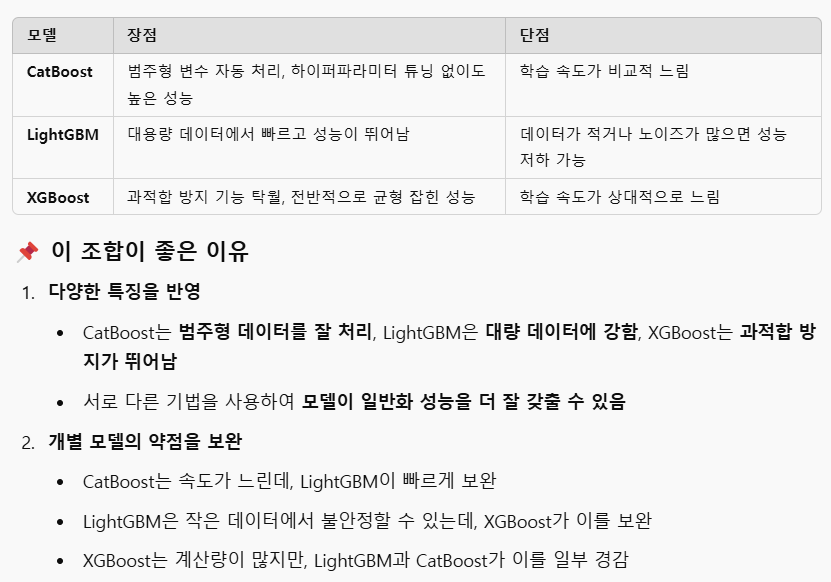

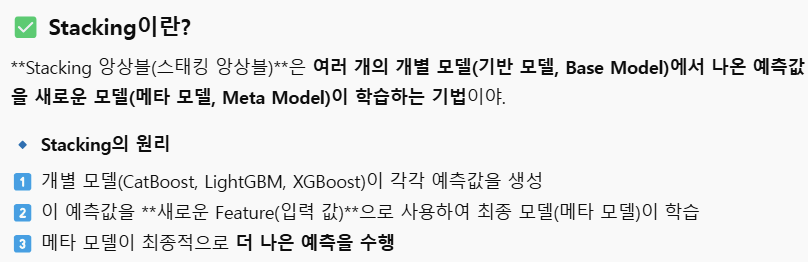

In [ ]:
import numpy as np
from sklearn.linear_model import RidgeCV

# 개별 모델 학습 (CatBoost, LightGBM, XGBoost)
catboost_model = CatBoostRegressor(random_seed=42)
lgbm_model = LGBMRegressor(random_state=42)
xgboost_model = XGBRegressor(random_state=42)


catboost_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)

# 예측값 생성
catboost_pred = catboost_model.predict(X_train)
lgbm_pred = lgbm_model.predict(X_train)
xgboost_pred = xgboost_model.predict(X_train)

# Stacking을 위한 데이터 생성
stacked_train = np.column_stack((catboost_pred, lgbm_pred, xgboost_pred))

# 릿지 회귀 모델 학습
ridge_model = RidgeCV(alphas=[0.1, 1, 10]) # 알파 값을 조정할 수 있습니다.
ridge_model.fit(stacked_train, y_train)

# 테스트 데이터에 대한 예측값 생성
catboost_pred_test = catboost_model.predict(X_test)
lgbm_pred_test = lgbm_model.predict(X_test)
xgboost_pred_test = xgboost_model.predict(X_test)
stacked_test = np.column_stack((catboost_pred_test, lgbm_pred_test, xgboost_pred_test))

# 릿지 회귀 모델로 최종 예측
final_predictions = ridge_model.predict(stacked_test)

# 평가 지표 계산
mae = mean_absolute_error(y_test, final_predictions)
rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
r2 = r2_score(y_test, final_predictions)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")


NameError: name 'CatBoostRegressor' is not defined

In [ ]:
# prompt: test1 파일로 예측하는 코드짜줘

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import RidgeCV

# Load the test data
test_data = pd.read_csv('test1.csv') # Replace 'test1.csv' with your actual file name

# Separate features (X) and target variable (y) in your test data
# Assuming the target variable column is named 'target'
# Replace 'target' with the actual name of your target column if different
X_test = test_data.drop('target', axis=1)
# Make sure to handle any missing values or categorical features in X_test


# Load the trained models (replace with your actual model loading code)
catboost_model = CatBoostRegressor()
lgbm_model = LGBMRegressor()
xgboost_model = XGBRegressor()
ridge_model = RidgeCV(alphas=[0.1, 1, 10])

# Load the trained models from files
catboost_model.load_model('catboost_model.cbm')  # Replace with actual file names
lgbm_model.load_model('lgbm_model.txt')
xgboost_model.load_model('xgboost_model.json')
# Load the ridge model
ridge_model = RidgeCV(alphas=[0.1, 1, 10]) # Or load your already trained RidgeCV model
ridge_model.load('ridge_model.joblib')


# Predictions for the test dataset
catboost_pred_test = catboost_model.predict(X_test)
lgbm_pred_test = lgbm_model.predict(X_test)
xgboost_pred_test = xgboost_model.predict(X_test)
stacked_test = np.column_stack((catboost_pred_test, lgbm_pred_test, xgboost_pred_test))

final_predictions = ridge_model.predict(stacked_test)


# Now you can use the final_predictions for your analysis or submission.
final_predictions



In [ ]:
test_prediction = ridge_model.predict(test1)
submission['Price']=test_prediction
submission.to_csv('preddd.csv',index=False)

NameError: name 'ridge_model' is not defined